In [1]:
import cv2 as cv
import numpy as np
import os
from pathlib import Path

def find_project_root(marker=".gitignore"):
    """
    walk up from the current working directory until a directory containing the
    specified marker (e.g., .gitignore) is found.
    """
    current = Path.cwd()
    for parent in [current] + list(current.parents):
        if (parent / marker).exists():
            return parent.resolve()
    raise FileNotFoundError(
        f"Project root marker '{marker}' not found starting from {current}"
    )

root = find_project_root()
image_path = f"{root}/test_1.png"
CHESSBOARD_SIZE = (9, 6) # columns, rows
square_size_mm = 60
border_mm = 15

In [2]:
def preprocess(image, upscale_factor=1):
    """
    convert image to grayscale, enhance contrast with histogram equalization,
    apply Gaussian blur to reduce noise, and optionally upscale the image.
    this makes the chessboard pattern stand out better.
    """
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray = cv.equalizeHist(gray)
    gray = cv.GaussianBlur(gray, (5, 5), 0)
    if upscale_factor > 1:
        gray = cv.resize(gray, None, fx=upscale_factor, fy=upscale_factor, interpolation=cv.INTER_CUBIC)
    return gray

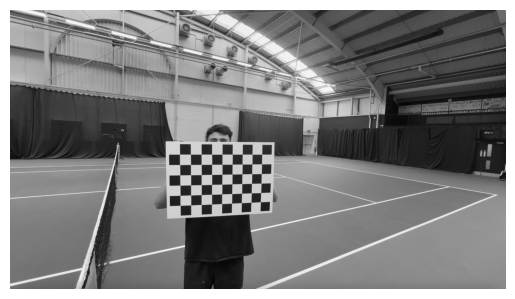

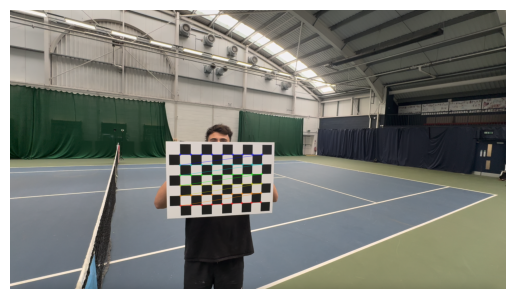

In [3]:
import matplotlib.pyplot as plt

def print_image(imread_img):
    img = cv.cvtColor(imread_img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
img = cv.imread(image_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray = preprocess(img)
print_image(gray)

# find the chessboard corners
flags = cv.CALIB_CB_NORMALIZE_IMAGE | cv.CALIB_CB_ADAPTIVE_THRESH
ret, corners = cv.findChessboardCorners(gray, CHESSBOARD_SIZE, flags=flags)

if ret:
  # get all the coordinates of the corners
  corners = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
  cv.drawChessboardCorners(img, CHESSBOARD_SIZE, corners, ret)
  print_image(img)
  cv.waitKey(1000)